In [1]:
import os
import sys

sys.path.append(os.getcwd().split('notebooks')[0])

from notebooks.utilities.utils import *

Device: cpu


In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt

import tensorly as tl
from tensorly.decomposition import parafac


# Load "Meta-Dataset"

In [3]:
# tensors = [
#            np.array(torch.load(f"{meta_data_folder}deep_learning/FCNN_Spambase_905_50.pt")),
#            np.array(torch.load(f"{meta_data_folder}deep_learning/FCNN_Dermatology_903.pt")),
#            np.array(torch.load(f"{meta_data_folder}non_deep/KNN_car_evaluation_828.pt")),
#            np.array(torch.load(f"{meta_data_folder}non_deep/SVM_Dermatology_905.pt"))
#            ]

In [4]:
tensors = [
           np.array(torch.load(f"{meta_data_folder}non_deep/SVM_Dermatology_905.pt")),
           np.array(torch.load(f"{meta_data_folder}deep_learning/FCNN_Spambase_905_50.pt")),
           np.array(torch.load(f"{meta_data_folder}query_tensors/AND_AND_801.pt")),
           np.array(torch.load(f"{meta_data_folder}query_tensors/AND_OR_distinct_817.pt"))
           ]

# Decomposition & Plot Reconstruction Error

In [5]:
errors_lists = list()

for t in range(len(tensors)):
    
    errors = list()

    for r in range(1, 50+1):                     # range of ranks to test
        
        errors+=[parafac(tensor=tensors[t], 
                        rank=r, 
                        n_iter_max=100, 
                        init='random', 
                        tol=1e-6, 
                        random_state=18, 
                        return_errors=True, 
                        sparsity=None)[1][-1]]
        
    print(f"{t+1}/{len(tensors)} tensors done.")
        
    errors_lists += [errors]

1/4 tensors done.
2/4 tensors done.


/opt/homebrew/lib/python3.11/site-packages/tensorly/backend/__init__.py:206: RuntimeWarning: invalid value encountered in sqrt
  return getattr(
/opt/homebrew/lib/python3.11/site-packages/tensorly/decomposition/_cp.py:414: RuntimeWarning: overflow encountered in multiply
  pseudo_inverse = pseudo_inverse * tl.dot(
/opt/homebrew/lib/python3.11/site-packages/tensorly/cp_tensor.py:638: RuntimeWarning: overflow encountered in multiply
  norm = norm * T.dot(T.transpose(f), T.conj(f))


3/4 tensors done.
4/4 tensors done.


In [6]:
title_dict = {0: 'Non-Deep Learning',
              1: 'Neural Architecture Search',
              2: 'Query Cardinality',
              3: 'Query Distinct Cardinality'}

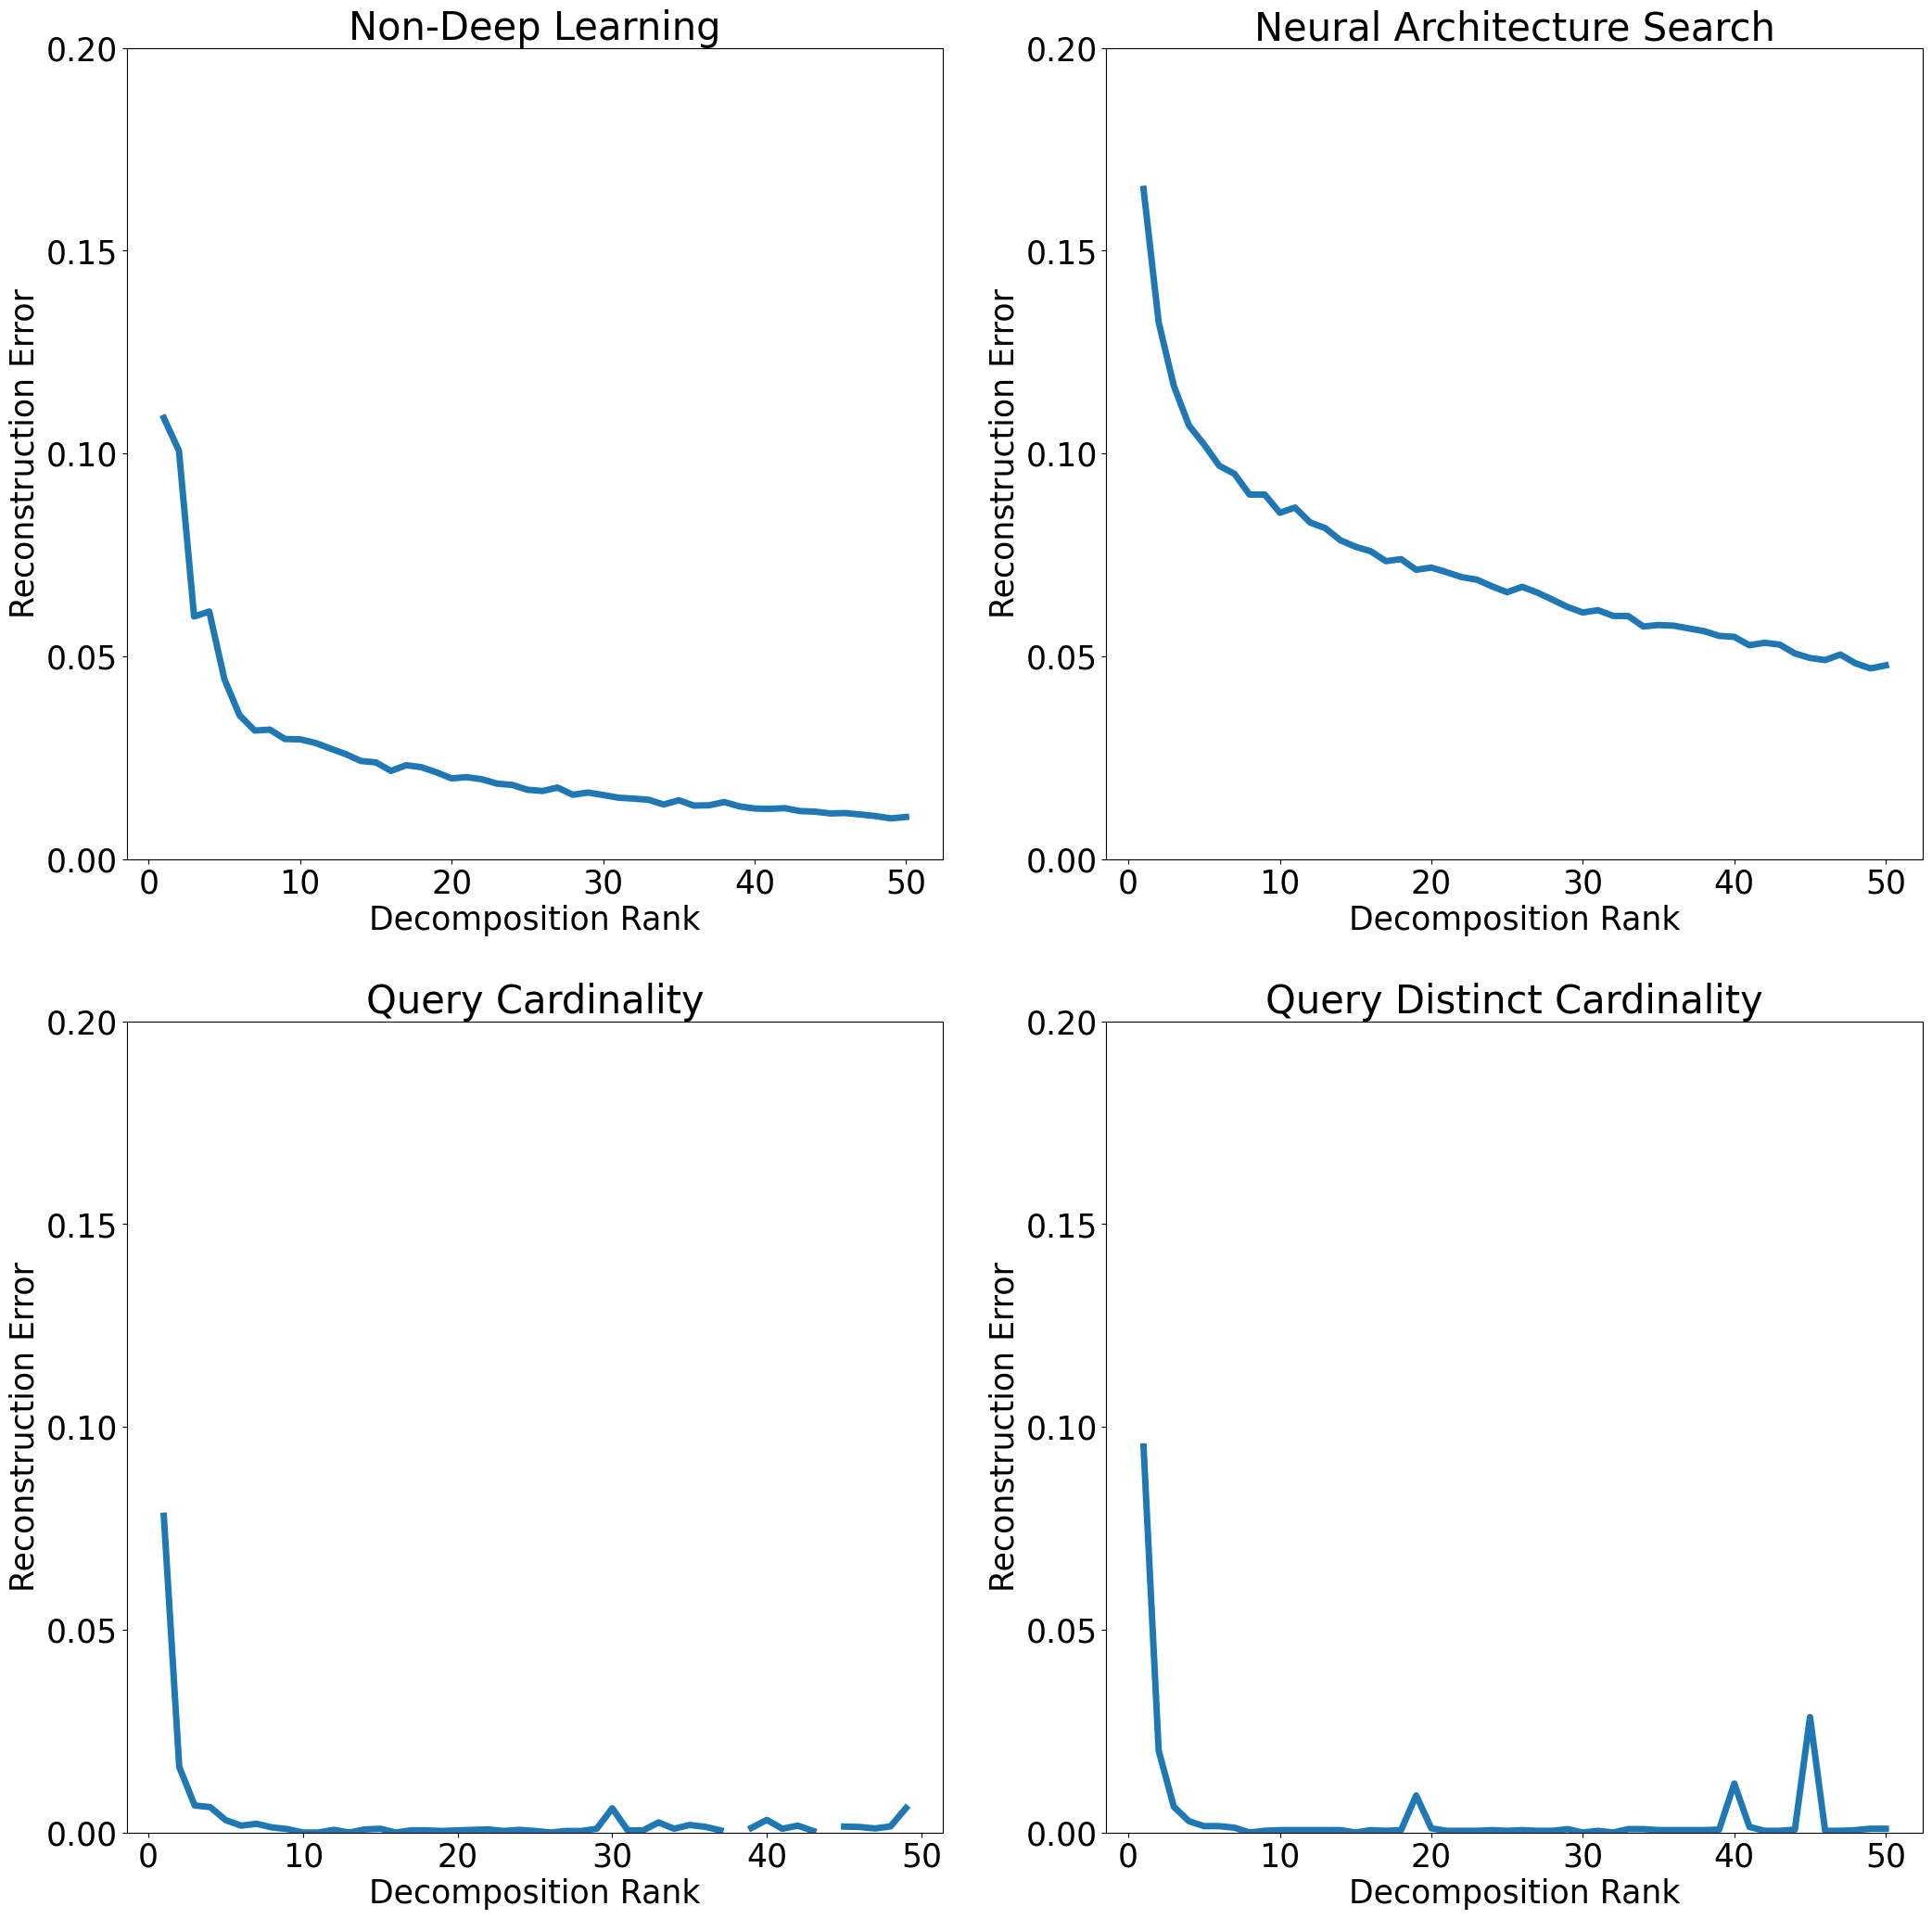

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(25, 25))

for i in range(len(title_dict)):
    
    sub_plot = axs[int(i/2), i%2]
        
    r_values = np.arange(len(errors_lists[i]))+1

    sub_plot.plot(r_values, errors_lists[i], linewidth=5)

    sub_plot.set_xticks([t for t in range(0, 50+1, 10)])
    sub_plot.set_yticks([t/100 for t in range(0, 20+1, 5)])

    sub_plot.set_title(title_dict[i], fontsize=30)

    sub_plot.set_xlabel('Decomposition Rank', fontsize=25)
    sub_plot.set_ylabel('Reconstruction Error', fontsize=25)

    sub_plot.set_ylim(0, 0.2)
    
    sub_plot.tick_params(axis='x', labelsize=25)
    sub_plot.tick_params(axis='y', labelsize=25)